## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
a = -1
b = 2
array1_shuffled = np.array([*range(20)])
array1_shuffled

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
array2_shuffled = a * array1_shuffled + b
array2_shuffled

array([  2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10,
       -11, -12, -13, -14, -15, -16, -17])

In [5]:

shuffler = np. random. permutation(len(array1_shuffled))
X = array1_shuffled[shuffler]
Y = array2_shuffled[shuffler]
print("X= ",X, "\nY= ",Y)

X=  [13 16  5 11  3 15 10  0  9  7  8 18 17 19 12 14  2  1  4  6] 
Y=  [-11 -14  -3  -9  -1 -13  -8   2  -7  -5  -6 -16 -15 -17 -10 -12   0   1
  -2  -4]


#### Plot your data points. 

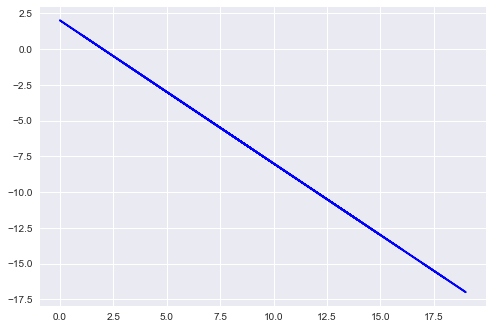

In [6]:
plt.style.use('seaborn')
plt.plot(X,Y,color='blue')
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [7]:
def linear_Regression(x, y, alpha, itera,b):
    theta_all = []
    cost = []
    
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while  (j < itera) and (abs(cost_new - cost_func)> 0.0001 or j == 0):
        cost_func = cost_new
        for i in range(0,int(n/b)):
            theta[0] = theta[0] - (alpha * (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0]))
            theta[1] = theta[1] - (alpha * (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1]))
            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        j +=1

    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta, theta[0], theta[1]

In [8]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = linear_Regression(X,Y, 0.0001, 1000, len(X))

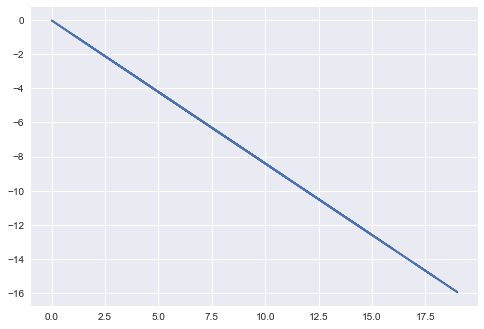

In [9]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

In [10]:
r2_score(Y, h_theta)

0.9660243759868553

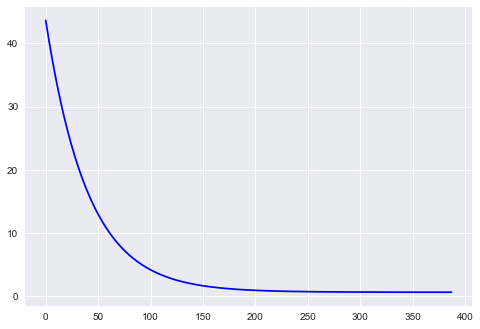

In [11]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

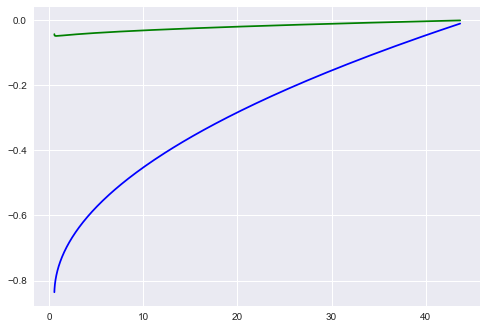

In [12]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

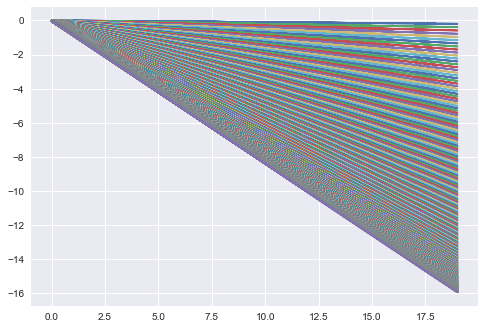

In [13]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

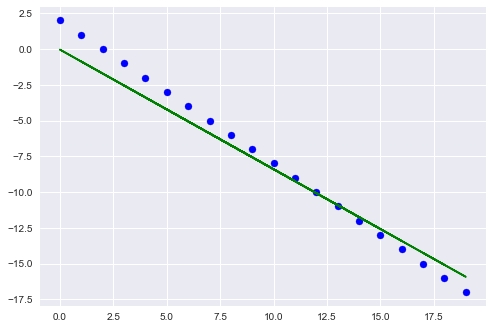

In [14]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

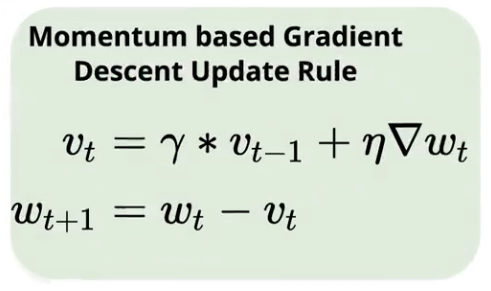

#### γ takes values between 0 and 1.
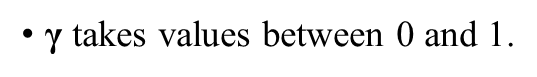

In [15]:
def Momentum(x, y, alpha, itera,b, gamma):
    theta_all = []
    cost = []
    
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while  (j < itera) and (abs(cost_new - cost_func)> 0.0001 or j == 0):
        cost_func = cost_new
        for i in range(0,int(n/b)):
            Vt[0] = gamma * Vt[0] + (alpha * (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0]))
            theta[0] = theta[0] - Vt[0]
            Vt[1] = gamma * Vt[1] + (alpha * (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1]))
            theta[1] = theta[1] - Vt[1]
            
            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        j +=1

    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta, theta[0], theta[1]

In [16]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = Momentum(X,Y, 0.01, 100,len(X), 0.7)

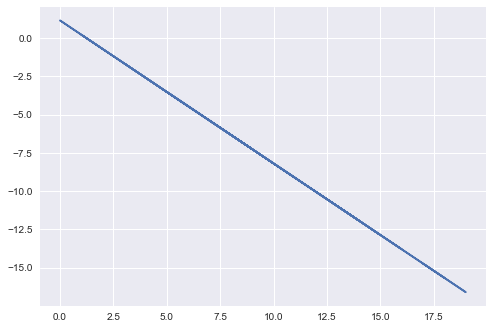

In [17]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

In [18]:
r2_score(Y, h_theta)

0.9942189104006629

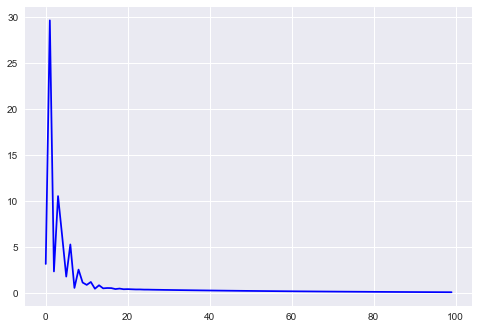

In [19]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

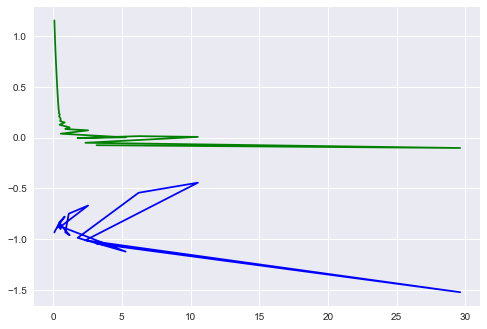

In [20]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

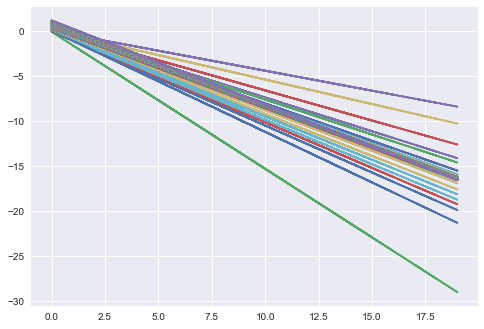

In [21]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

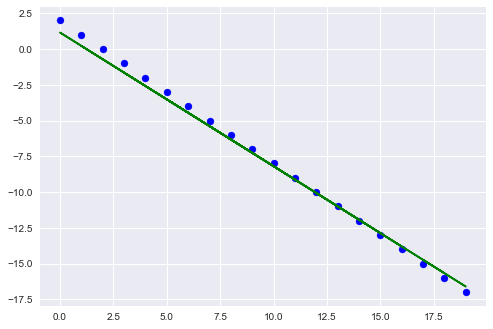

In [22]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

In [23]:
r2_score(Y, h_theta)

0.9942189104006629

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [24]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = Momentum(X,Y, 0.01, 100,len(X), 0.01)

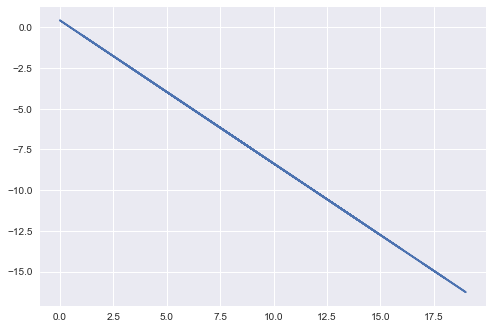

In [25]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

In [26]:
r2_score(Y, h_theta)

0.9799099259131323

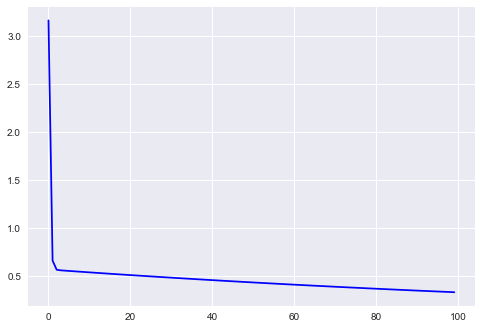

In [27]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

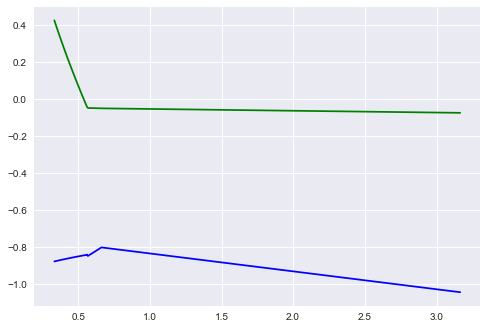

In [28]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

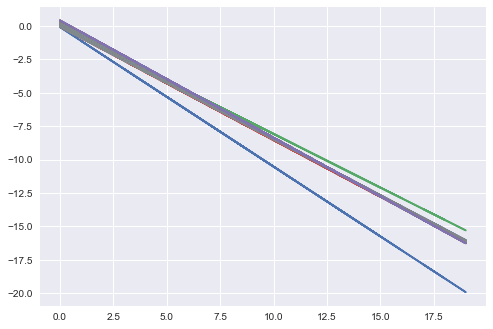

In [29]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

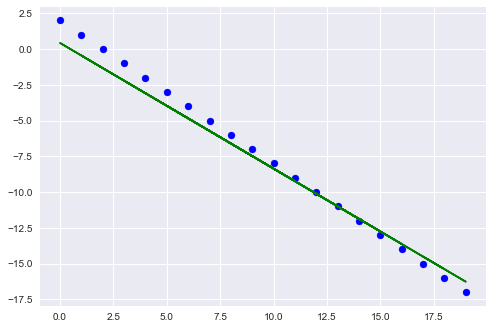

In [30]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

In [31]:
r2_score(Y, h_theta)

0.9799099259131323

### Larg value

In [32]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = Momentum(X,Y, 0.01, 100,len(X), 0.9)

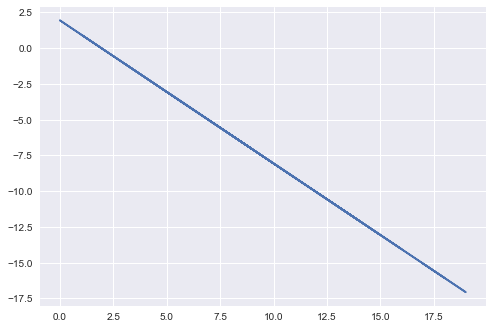

In [33]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

In [34]:
r2_score(Y, h_theta)

0.9998793222107526

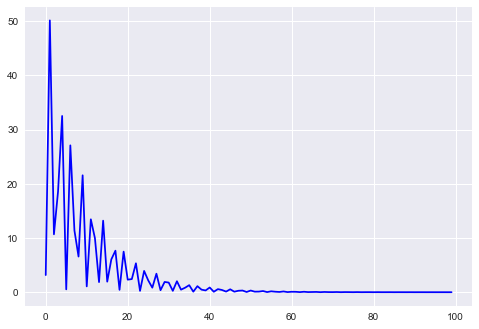

In [35]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

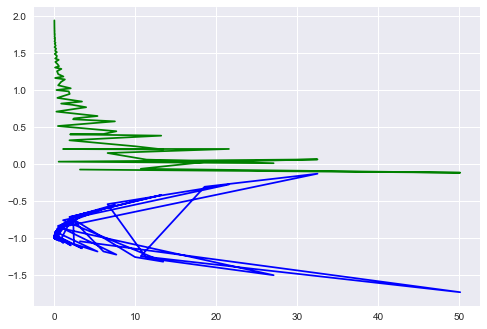

In [36]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

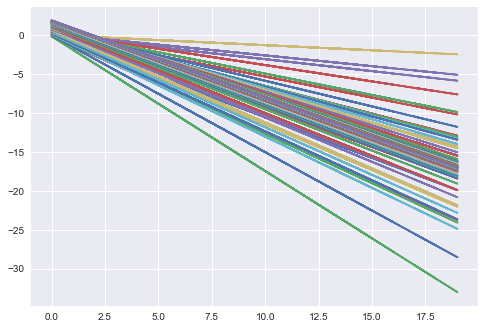

In [37]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

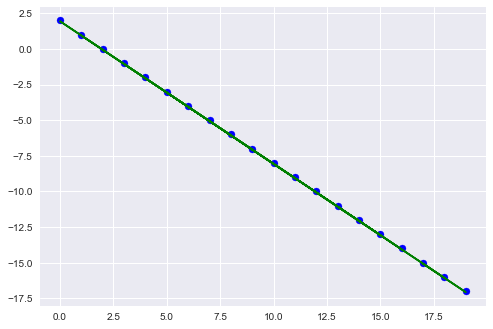

In [38]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

In [39]:
r2_score(Y, h_theta)

0.9998793222107526

### Update your Batch GD for one variable  implementation to be NAG and check your results

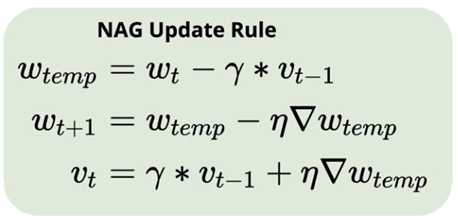

In [40]:
def NAG_algorism(x, y, alpha, itera,b, gamma):
    theta_all = []
    cost = []
    
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    theta_new = np.array([0.0,0.0])
    Vt_1 = np.array([0.0,0.0])
    h_theta = feature.dot(theta)
    j = 0
    while  (j < itera) and (abs(cost_new - cost_func)> 0.0001 or j == 0):
        cost_func = cost_new
        for i in range(0,int(n/b)):
            w_temp = theta - gamma * Vt_1
            h_theta = feature.dot(w_temp)
            deltheta = alpha * (1/(n)) * np.array([sum ((h_theta.T-y) * feature[:,0]),sum ((h_theta.T-y) * feature[:,1])])

            theta_new = w_temp - deltheta
            Vt_1 = gamma * Vt_1 + deltheta

            theta = theta_new
            
            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        j +=1

    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta, theta[0], theta[1]

In [41]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = NAG_algorism(X,Y, 0.01, 100,len(X), 0.6)

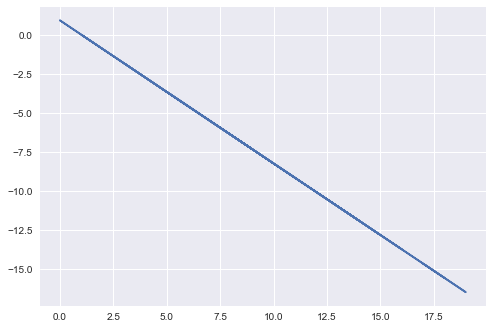

In [42]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

In [43]:
r2_score(Y, h_theta)

0.9908729465361453

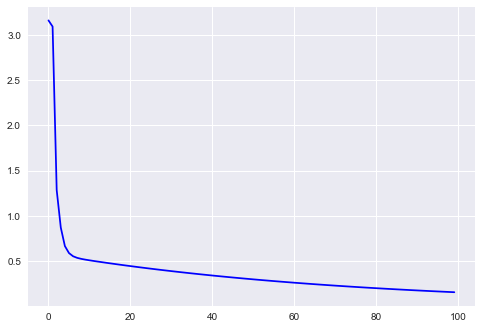

In [44]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

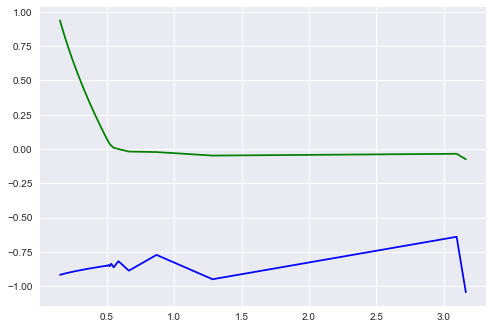

In [45]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

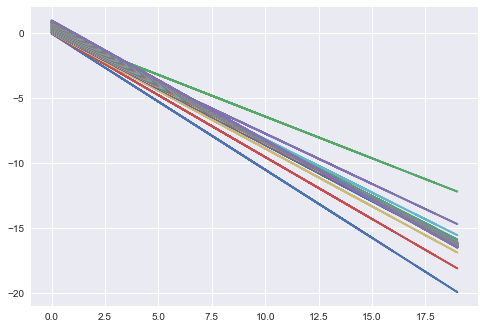

In [46]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

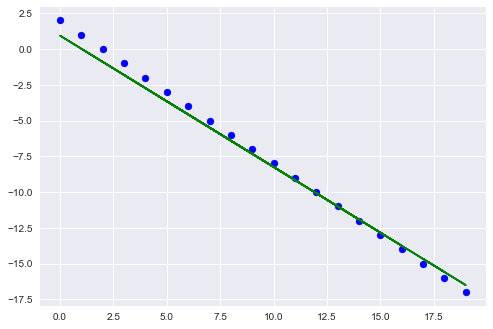

In [47]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

In [48]:
r2_score(Y, h_theta)

0.9908729465361453

## Congratulations 
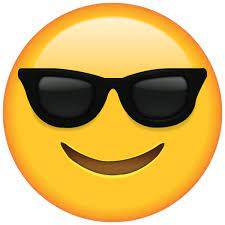